# Stars

## Project C131

### Getting Data

In [32]:
import pandas

stars_data_frame = pandas.read_csv(r'data\final_data_cleaned.csv')
stars_data_frame.drop(['Unnamed: 0'], axis=1, inplace=True)
stars_data_frame['Radius'] = stars_data_frame['Radius'].apply(
    lambda x: x.replace('$', '').replace(',', '')).astype('float')


### Converting Solar Mass and Radius into KM & KG

In [33]:
radius = stars_data_frame['Radius'].to_list()
mass = stars_data_frame['Mass'].to_list()
gravity = []


def convert_to_si(radius, mass):
    for i in range(0, len(radius)-1):
        radius[i] = radius[i] * 6.957e+8
        mass[i] = mass[i] * 1.989e+30


convert_to_si(radius, mass)


### Calculating Gravity

In [34]:
def gravity_calculation(radius, mass):
    G = 6.674e-11
    for index in range(0, len(mass)):
        g = (mass[index] * G) / ((radius[index]) ** 2)
        gravity.append(g)


gravity_calculation(radius, mass)

stars_data_frame["Gravity"] = gravity
stars_data_frame['Distance'] = stars_data_frame['Distance'].apply(
    lambda x: x.replace('$', '').replace(',', '')).astype('float')
stars_data_frame.to_csv("data/stars_with_gravity.csv")


## Project C132

### Getting Data

In [35]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

gravity_stars_data_frame = pandas.read_csv("data/stars_with_gravity.csv")

mass = gravity_stars_data_frame["Mass"].to_list()
radius = gravity_stars_data_frame["Radius"].to_list()
distance = gravity_stars_data_frame["Distance"].to_list()
gravity = gravity_stars_data_frame["Gravity"].to_list()

mass.sort()
radius.sort()
gravity.sort()


### Mass vs Radius

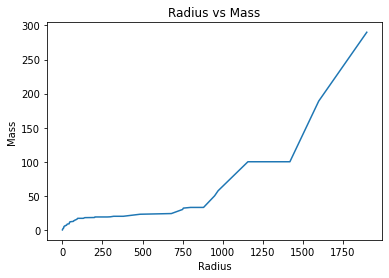

In [36]:
plt.plot(radius, mass)

plt.title("Radius vs Mass")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()


### Mass vs Gravity

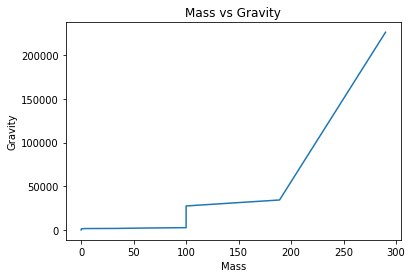

In [37]:
plt.plot(mass,gravity)

plt.title("Mass vs Gravity")
plt.xlabel("Mass")
plt.ylabel("Gravity")
plt.show()

### Scatter Mass vs Radius

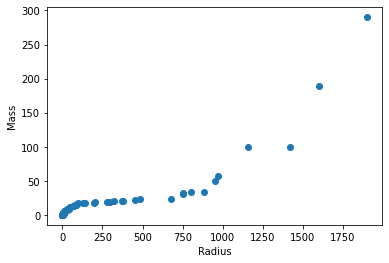

In [38]:
plt.scatter(radius,mass)
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

## Project C133

### Clustering

In [39]:
from sklearn.cluster import KMeans

X = gravity_stars_data_frame.iloc[:, [3, 4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append((kmeans.inertia_))


### Graph for Clustering

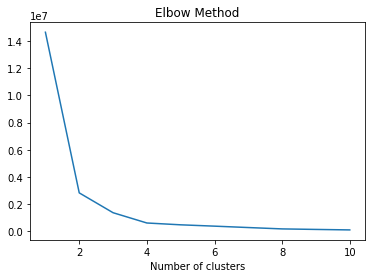

In [40]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.show()


## Project C134

### Filtering the Stars based on Distance

In [41]:
bools = []
for d in gravity_stars_data_frame.Distance:
    if int(float(d)) <= 100:
        bools.append(True)
    else:
        bools.append(False)

is_dist = pandas.Series(bools)
is_dist.head()

star_dist = gravity_stars_data_frame[is_dist]

star_dist.reset_index(inplace=True, drop=True)
star_dist.head()


,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,4,Arcturus,37.000000,1.1,26.00,0.446296
4,5,Vega,25.000000,2.2,2.70,82.769843


### Keep the Stars having Gravity similar to Sun

In [43]:
gravity_bool = []
for g in star_dist.Gravity:
    if g <= 350 and g >= 150:
        gravity_bool.append(True)
    else:
        gravity_bool.append(False)

is_gravity = pandas.Series(gravity_bool)


### Creating Filtered Stars CSV

In [49]:
final_stars = star_dist[is_gravity]
final_stars.drop(["Unnamed: 0"], axis=1, inplace=True)
final_stars.reset_index(inplace=True, drop=True)
final_stars.to_csv("data/filtered_stars.csv")
final_stars.head()


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Star_name,Distance,Mass,Radius,Gravity
0,Sun,0.000016,1.0,1.00,274.269161
1,Sirius,8.600000,2.1,1.71,196.971800
2,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,Altair,17.000000,1.8,1.80,152.371756
4,Fomalhaut,25.000000,1.9,1.80,160.836854
